In [1]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')


# 부스팅 Classifier이 아닌 Regressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

# 정확도 예측
from sklearn.metrics import accuracy_score,f1_score

In [2]:
# HoBo
df_oo = pd.read_csv('/content/drive/MyDrive/ch5. 소득예측/train_3ox.csv')

# test = pd.read_csv('/content/drive/MyDrive/ch5. 소득예측/test_oom.csv')

In [3]:
# 라벨 인코딩
from sklearn.preprocessing import LabelEncoder

# 함수 만들기
def label_encoder(df) :
  # 라이브러리 불러오기
  from sklearn.preprocessing import LabelEncoder
  # 인코딩할 칼럼 추출
  df_categorical = df.select_dtypes(include=['object']).columns
  # 식별자 ID 제외하기
  df_categorical = df_categorical.drop('ID')
  # 라벨 인코딩 적용
  label_encoder = LabelEncoder()
  df[df_categorical] = df[df_categorical].apply(label_encoder.fit_transform)

In [4]:
label_encoder(df_oo)

In [5]:
# def split_column(df) :
#   X_features = df.loc[:,(df.columns != 'ID') & (df.columns != 'Income')]
#   y_label = df['Income']

# split_column(df_oo)
# 음...

In [6]:
# # # features와 label 분리 작업 + 연령대로 머신러닝
X_features = df_oo.loc[:,(df_oo.columns != 'ID') & (df_oo.columns != 'Income')]
y_label = df_oo['Income']

In [7]:
# # # features와 label 분리 작업 + Age로 머신러닝
# X_features = df_oo.loc[:,(df_oo.columns != 'Age_category') & (df_oo.columns != 'ID') & (df_oo.columns != 'Income')]
# y_label = df_oo['Income']

In [8]:
# train_ test분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state = 42)

In [9]:
# # feature_select
# # Age_category, Industry_Status, Occupation_Status, Martial_Status, check_us ....
# df_column = ['Age_category','Occupation_Status','Industry_Status']
# X_train = X_train[df_column]
# X_test = X_test[df_column]

In [10]:
X_train.columns

Index(['Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Summary', 'Citizenship',
       'Birth_Country', 'Tax_Status', 'Gains', 'Losses', 'Dividends',
       'Income_Status', 'check_us', 'Age_category', 'revenue', 'profit',
       'Active_age', 'Set_gender_age', 'Degree_ox', 'Group_Education',
       'Group1_Employment', 'Group2_Employment', 're_martial', 'Native_ox',
       'Allother_ox', 'Race_ox'],
      dtype='object')

In [11]:
# 평가지표
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error
import numpy as np

def evaluation(y_test, y_pred) :
  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  # MdAPE를 잘 쓰곤 함. 직관적이여서(외부공유)
  mdape = np.median(np.abs((y_test - y_pred) / y_test)) * 100
  mape = mean_absolute_percentage_error(y_test,y_pred)
  print('rmse : {}, mae : {}, mdape : {}, mape : {}'.format(rmse, mae, mdape, mape ))

# XGBM

In [12]:
import xgboost as xgb
# DMatrix 형태 변환......?
dtrain = xgb.DMatrix(data = X_train, label = y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)

In [13]:
# xgboost
from xgboost import XGBRegressor
# 모델
xgb_model = XGBRegressor()
# 학습
xgb_model.fit(X_train, y_train,)
# 예측
xgb_pred = xgb_model.predict(X_test)
# 평가
evaluation(y_test, xgb_pred)

rmse : 618.8874145806643, mae : 347.37050702843817, mdape : 62.69396763989049, mape : 6.444985499274833e+17


In [14]:
# params 설정?...😵‍💫

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

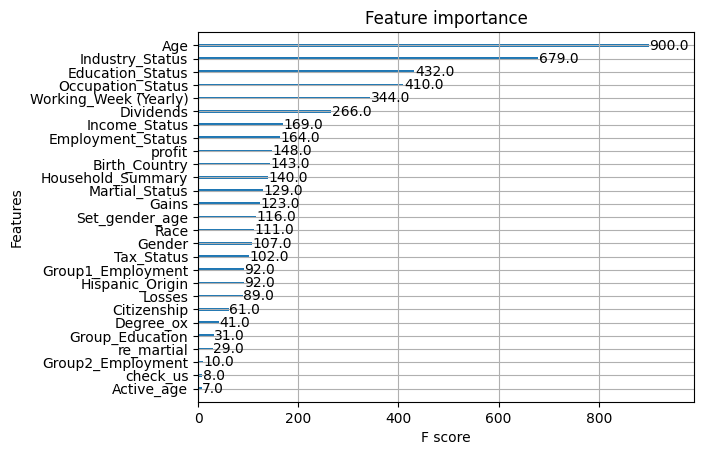

In [15]:
# feature 중요도 시각화
xgb.plot_importance(xgb_model)

# LGBM

In [16]:
from lightgbm import LGBMRegressor
import lightgbm as lgbm

In [17]:
# 모델
lgbm_model = LGBMRegressor()
# 학습
lgbm_model.fit(X_train, y_train)
# 예측
lgbm_pred = lgbm_model.predict(X_test)
# 평가
evaluation(y_test, lgbm_pred)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1085
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 32
[LightGBM] [Info] Start training from score 556.153500
rmse : 593.6634595704467, mae : 327.46773804836334, mdape : 56.11355577980779, mape : 6.263880002724396e+17


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

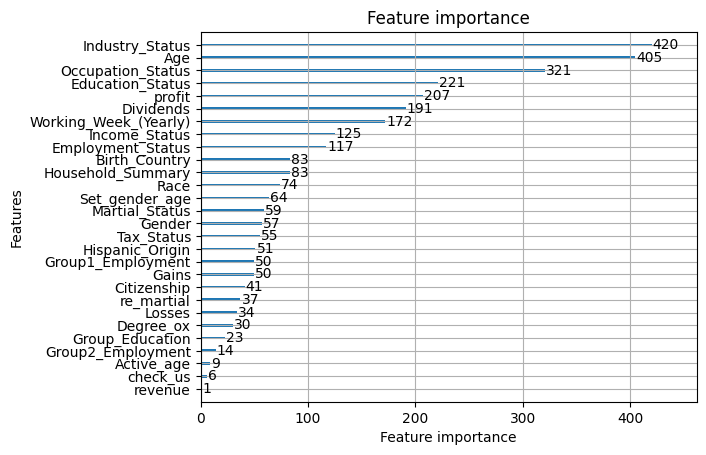

In [18]:
lgbm.plot_importance(lgbm_model)

# Catboost

In [19]:
!pip install catboost

In [20]:
from catboost import CatBoostRegressor
# 모델
cat_model = CatBoostRegressor()
# 학습
cat_model.fit(X_train, y_train)
# 예측
ct_pred = cat_model.predict(X_test)
# 평가
evaluation(y_test, ct_pred)

Learning rate set to 0.06345
0:	learn: 691.8309144	total: 79.1ms	remaining: 1m 19s
1:	learn: 683.3984067	total: 101ms	remaining: 50.3s
2:	learn: 675.0407998	total: 118ms	remaining: 39.1s
3:	learn: 668.0592220	total: 148ms	remaining: 36.8s
4:	learn: 661.5063227	total: 154ms	remaining: 30.6s
5:	learn: 655.8792284	total: 160ms	remaining: 26.4s
6:	learn: 651.0391642	total: 166ms	remaining: 23.5s
7:	learn: 646.2677778	total: 176ms	remaining: 21.8s
8:	learn: 642.3669974	total: 187ms	remaining: 20.6s
9:	learn: 638.6405879	total: 194ms	remaining: 19.2s
10:	learn: 635.4536274	total: 201ms	remaining: 18s
11:	learn: 632.4544878	total: 208ms	remaining: 17.1s
12:	learn: 629.9761684	total: 214ms	remaining: 16.3s
13:	learn: 627.2813931	total: 221ms	remaining: 15.6s
14:	learn: 625.0663565	total: 231ms	remaining: 15.2s
15:	learn: 622.7968857	total: 242ms	remaining: 14.9s
16:	learn: 620.9895451	total: 252ms	remaining: 14.6s
17:	learn: 619.3191383	total: 266ms	remaining: 14.5s
18:	learn: 617.6859971	tota

# Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor
#모델
rf_model = RandomForestRegressor()
#학습
rf_model.fit(X_train,y_train)
#예측
rf_pred = rf_model.predict(X_test)
#평가
evaluation(y_test, rf_pred)

rmse : 617.243379167929, mae : 346.5058974753788, mdape : nan, mape : 6.30538561792684e+17


In [22]:
from sklearn.pipeline import Pipeline, make_pipeline

# 파이프라인 만들기
pipe_rf = make_pipeline(RandomForestRegressor())
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('randomforestregressor', RandomForestRegressor())])

In [23]:
# 특성 중요도 데이터 프레임 생성
importance_rf = pipe_rf[0].feature_importances_
feature_rf = X_train.columns
importances_rf = pd.DataFrame()
importances_rf['feature'] = feature_rf
importances_rf['importances'] = importance_rf
importances_rf.sort_values('importances', ascending=False, inplace=True)
importances_rf.reset_index(drop=True, inplace=True)
importances_rf

,feature,importances
0,Occupation_Status,0.257806
1,Age,0.133388
2,Industry_Status,0.100762
3,Education_Status,0.054436
4,Working_Week (Yearly),0.051105
5,Dividends,0.039620
6,Income_Status,0.034945
7,profit,0.034674
8,Household_Summary,0.031215
9,Martial_Status,0.024642


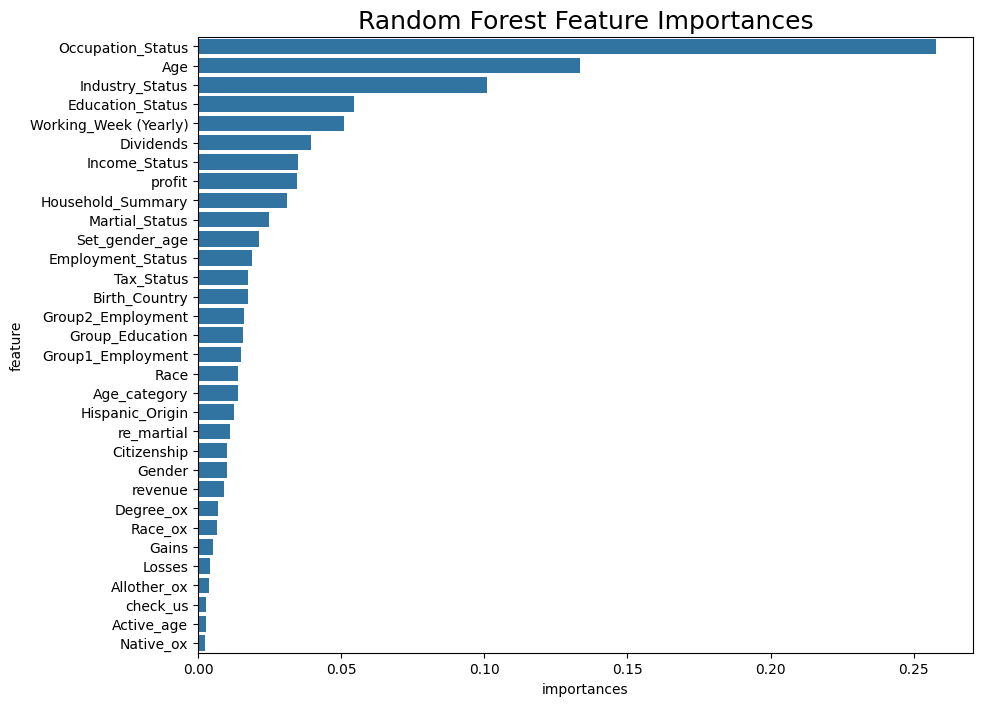

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
# 특성 중요도 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x='importances', y='feature', data=importances_rf)
plt.title('Random Forest Feature Importances', fontsize=18)
plt.show()

# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeRegressor
# 모델
dt_model = DecisionTreeRegressor(random_state = 42)
# 학습
dt_model.fit(X_train,y_train)
# 예측
dt_pred = dt_model.predict(X_test)
# 평가
evaluation(y_test,dt_pred)

rmse : 851.5781387789265, mae : 459.4330625, mdape : nan, mape : 6.284356697029996e+17


In [26]:
from sklearn.pipeline import Pipeline, make_pipeline

# 파이프라인 만들기
pipe_dt = make_pipeline(DecisionTreeRegressor())
pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('decisiontreeregressor', DecisionTreeRegressor())])

In [27]:
# 특성 중요도 데이터 프레임 생성
importance_dt = pipe_dt[0].feature_importances_
feature_dt = X_train.columns
importances_dt = pd.DataFrame()
importances_dt['feature'] = feature_dt
importances_dt['importances'] = importance_dt
importances_dt.sort_values('importances', ascending=False, inplace=True)
importances_dt.reset_index(drop=True, inplace=True)
importances_dt

,feature,importances
0,Occupation_Status,0.247392
1,Age,0.131153
2,Industry_Status,0.101999
3,Working_Week (Yearly),0.057504
4,Education_Status,0.050945
5,profit,0.039442
6,Income_Status,0.036935
7,Dividends,0.029623
8,Household_Summary,0.029162
9,Martial_Status,0.026431


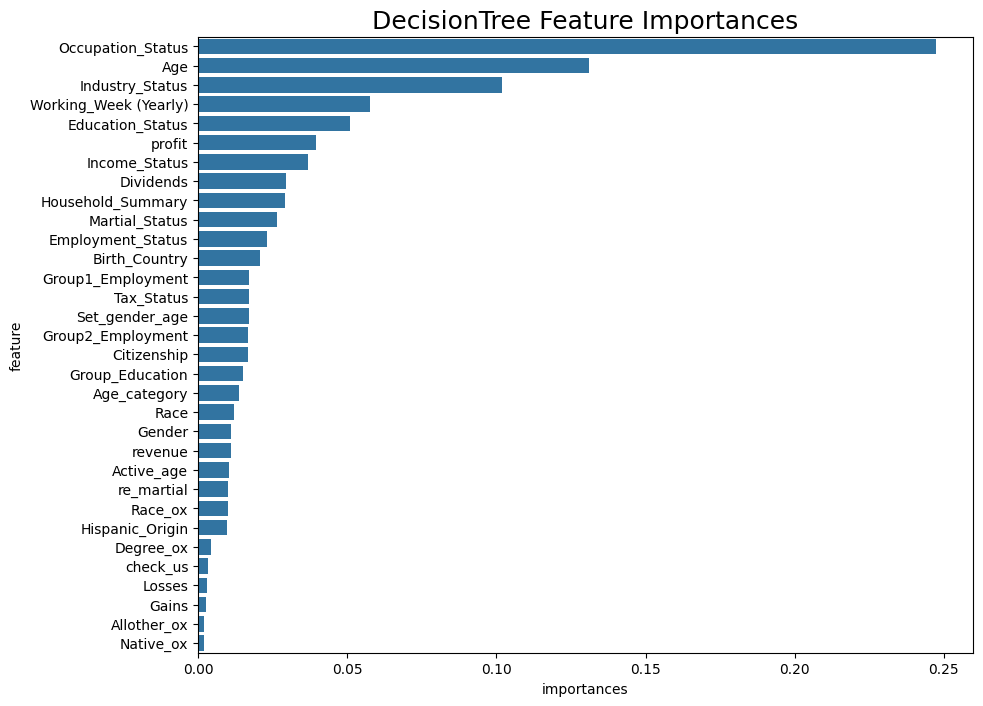

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
# 특성 중요도 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x='importances', y='feature', data=importances_dt)
plt.title('DecisionTree Feature Importances', fontsize=18)
plt.show()